In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from mpmath import gammainc as gmc

In [12]:
Lx, Ly = 10, 10; N = Lx*Ly

In [13]:
## chess board style
model = np.array([1 if i%2 == 0 else -1 for i in range(N)]) 

## r_i to r_j dist with dlx, dly peridoic condtion
def dist(i,j,dlx = 0,dly = 0):
    return ((dlx+(i%Lx-j%Lx))**2+(dly+(i/Lx-j/Lx))**2)**(1/2)
def min(a,b):
    if(a > b):
        return b
    else:
        return a

def r_l(i,j,lx,ly):
    dx = [0,lx,-lx]
    dy = [0,ly,-ly]
    min_v = 0
    for xx in dx:
        for yy in dy:
            min_v = min(min_v,dist(i,j,xx,yy))
    return min_v

def v_short(i,j,kap):
    r = r_l(i,j,Lx,Ly)
    for i in range(100):
        for j in range(100):
            a =  3

In [14]:
def dist_2pt(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**(1/2)

def vec_mul(x1,y1,x2,y2):
    return x1*x2+y1*y2

def xof(i):
    return i%Lx

def yof(i):
    return int(i/Lx)

In [15]:
## (1) Naive order 1 pi(i,j) ex) coulomb potential
def naive_pi(i,j,m,cutoff = 1e-4):
    res = 0
    idx = 0
    loop = True
    calc = 0
    while loop :
        for gg in range(idx+1):
            nx = gg
            ny = idx-gg
            for kk in range(2-(nx==0)):
                for ll in range(2-(ny==0)):
                    calc += 1
                    print(xof(i)-xof(j),yof(i)-yof(j),nx*Lx*(1-2*kk),ny*Ly*(1-2*ll))
                    inv_dist = dist_2pt(xof(i)-xof(j),yof(i)-yof(j),nx*Lx*(1-2*kk),ny*Ly*(1-2*ll))**(-m)
                    if(inv_dist < cutoff): ## default : 1e-7 (float precision)
                        print(nx,ny,inv_dist,calc)
                        loop = False
                        break
                    print(nx*(1-2*kk),ny*(1-2*ll),inv_dist)
                    res += inv_dist
        idx += 1
    return res

In [16]:
# naive_pi(1,2,2,1e-8)

In [17]:
# naive_pi(1,2,2)

In [18]:
# for i in range(N-1):
#     print(naive_pi(1,i+1))

In [19]:
# ## Naive periodic summation of Neutral System
# sum = 0
# for i in range(N):
#     for j_ in range(N-i-1):
#         j = i+j_+1
#         sum += naive_pi(i,j,1e-3)*model[i]*model[j]

# print(sum)

-1 0 0 0
0 0 1.0
-1 0 0 10
0 1 0.9976951001120373
-1 0 0 -10
0 -1 0.9976951001120373
-1 0 10 0
1 0 0.9976049773815044
-1 0 -10 0
-1 0 0.9978051875535975
-1 0 0 20
0 2 0.9970075057499782
-1 0 0 -20
0 -2 0.9970075057499782
-1 0 10 10
1 1 0.9973045578943676
-1 0 10 -10
1 -1 0.9973045578943676
-1 0 -10 10
-1 1 0.997404126605897
-1 0 -10 -10
-1 -1 0.997404126605897
-1 0 20 0
2 0 0.9969601074209521
-1 0 -20 0
-2 0 0.9970598916298372
-1 0 0 30
0 3 0.9966040267764433
-1 0 0 -30
0 -3 0.9966040267764433
-1 0 10 20
1 2 0.9968770116838681
-1 0 10 -20
1 -2 0.9968770116838681
-1 0 -10 20
-1 2 0.9969168291283873
-1 0 -10 -20
-1 -2 0.9969168291283873
-1 0 20 10
2 1 0.9968582360624316
-1 0 20 -10
2 -1 0.9968582360624316
-1 0 -20 10
-2 1 0.9969379984967608
-1 0 -20 -10
-2 -1 0.9969379984967608
-1 0 30 0
3 0 0.9965719021862822
-1 0 -30 0
-3 0 0.9966383671525212
-1 0 0 40
0 4 0.9963176048510903
-1 0 0 -40
0 -4 0.9963176048510903
-1 0 10 30
1 3 0.9965417247472449
-1 0 10 -30
1 -3 0.9965417247472449
-1 0 -1

KeyboardInterrupt: 

In [20]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammaincc.html#scipy.special.gammaincc
ss.gammaincc(1.7,2)

0.31821129921897645

In [21]:
def general_pi1(i,j,m,kappa,cutoff=1e-3):
    res = 0
    idx = 0
    loop = True
    calc = 0
    while idx < 6 :
        for gg in range(idx+1):
            nx = gg
            ny = idx-gg
            for kk in range(2-(nx==0)):
                for ll in range(2-(ny==0)):
                    calc += 1
                    dis = dist_2pt(xof(i)-xof(j),yof(i)-yof(j),nx*Lx*(1-2*kk),ny*Ly*(1-2*ll))
                    inv_dist = dis**(-m)
                    temp = inv_dist*ss.gammaincc(m/2,(kappa*dis)**2)
                    # if(temp < cutoff): ## default : 1e-6 (float precision)
                    #     # print(nx,ny,temp,calc)
                    #     loop = False
                    #     break
                    # # print(nx*(1-2*kk),ny*(1-2*ll),inv_dist)
                    res += temp
        idx += 1
    return res

def general_pi2(i,j,m,kappa,cutoff=1e-3):
    res = 0
    idx = 1
    factor = 2*np.pi**(2/2)/(ss.gamma(m/2)*Lx*Ly)
    while idx < 6 :
        for gg in range(idx+1):
            nx = float(gg)/float(Lx)
            ny = float(idx-gg)/float(Ly)
            for kk in range(2-(nx==0)):
                for ll in range(2-(ny==0)):
                    hx = nx*(1-2*kk)
                    hy = ny*(1-2*ll)
                    temp = np.cos(2*np.pi*vec_mul(hx,hy,xof(i)-xof(j),yof(i)-yof(j)))
                    # print("1",temp)
                    pik = np.pi*dist_2pt(hx,hy,0,0)
                    temp *= (1/2)*(pik)**(m-2)
                    # print("2",temp)
                    temp *= gmc(-(1/2)*(m-2),(pik/kappa)**2)
                    # print("3",temp)
                    # # if(temp < cutoff): ## default : 1e-6 (float precision)
                    #     # print(hx,hy,temp,calc)
                    #     loop = False
                    #     break
                    # print(idx,hx,hy,temp)
                    res += temp
        idx += 1
    return factor*res

In [22]:
gmc(-2,3)

mpf('0.00099229406178030278')

In [23]:
gmc(1,3)

mpf('0.049787068367863944')

In [24]:
ss.expi(-3)

-0.013048381094197039

In [25]:
# naive_pi(1,4,3,1e-10)

-3 0 0 0
0 0 0.037037037037037035
-3 0 0 10
0 1 0.0008787397112120654
-3 0 0 -10
0 -1 0.0008787397112120654
-3 0 10 0
1 0 0.0004551661356395084
-3 0 -10 0
-1 0 0.0029154518950437317
-3 0 0 20
0 2 0.0001208968646538261
-3 0 0 -20
0 -2 0.0001208968646538261
-3 0 10 10
1 1 0.00022665827540880752
-3 0 10 -10
1 -1 0.00022665827540880752
-3 0 -10 10
-1 1 0.0005498200808852622
-3 0 -10 -10
-1 -1 0.0005498200808852622
-3 0 20 0
2 0 8.218952905399852e-05
-3 0 -20 0
-2 0 0.0002035416242621616
-3 0 0 30
0 3 3.6488345808947165e-05
-3 0 0 -30
0 -3 3.6488345808947165e-05
-3 0 10 20
1 2 7.367694343590835e-05
-3 0 10 -20
1 -2 7.367694343590835e-05
-3 0 -10 20
-1 2 0.00010510672119888835
-3 0 -10 -20
-1 -2 0.00010510672119888835
-3 0 20 10
2 1 6.339047876223369e-05
-3 0 20 -10
2 -1 6.339047876223369e-05
-3 0 -20 10
-2 1 0.0001303393641551141
-3 0 -20 -10
-2 -1 0.0001303393641551141
-3 0 30 0
3 0 2.7826474107465842e-05
-3 0 -30 0
-3 0 5.080526342529086e-05
-3 0 0 40
0 4 1.5494084988944316e-05
-3 0 0 -40

KeyboardInterrupt: 

In [26]:
a = general_pi1(1,4,3,2/10,cutoff=1e-15)
print(a)

0.03302271842113099


In [27]:
b = general_pi2(1,4,3,2/10,1e-15)
print(b)
print(a+b)

0.000215708039046701
0.0332384264601777


In [28]:
b = general_pi2(1,4,2,2/10,1e-15)

In [29]:
Lx, Ly = 256, 256; N = Lx*Ly
ls = []
for i in range(255):
    a = general_pi1(0,1+i,3,2/Lx,1e-15)
    b = general_pi2(0,1+i,3,2/Lx,1e-15)
    # print(i+1,b)
    print(i+1, a,b,a+b)
    ls.append(a+b)


1 0.9999996523804474 4.09039237940882e-8 0.999999693284371
2 0.12499965243107408 4.08845536315985e-8 0.124999693315628
3 0.037036689552494596 4.08522830240711e-8 0.0370367304047776
4 0.015624652633606398 4.08071314581377e-8 0.0156246934407379
5 0.007999652785532536 4.07491261984858e-8 0.00799969353465873
6 0.00462928260088107 4.0678302271273e-8 0.00462932327918334
7 0.0029151050858258684 4.05947024428225e-8 0.00291514568052831
8 0.0019527784441472679 4.04983771936095e-8 0.00195281894252446
9 0.0013713958438560342 4.03893846875572e-8 0.00137143623324072
10 0.0009996540524900225 4.02677907366612e-8 0.000999694320280759
11 0.0007509692084334253 4.01336687609636e-8 0.000751009342102186
12 0.0005783585002404388 3.99870997439025e-8 0.000578398487340183
13 0.00045482135518643533 3.98281721830649e-8 0.000454861183358618
14 0.00036408716348943767 3.96569820363733e-8 0.000364126820471474
15 0.00029595246407018 3.94736326637401e-8 0.000295991937702844
16 0.00024379731809732037 3.92782347642259e-8

In [37]:
a = general_pi1(0,65533,3,2/Lx,1e-15)
b = general_pi2(0,65533,3,2/Lx,1e-15)
a+b

mpf('0.031622469979831702')

In [38]:
a = general_pi1(0,256+3,3,2/Lx,1e-15)
b = general_pi2(0,256+3,3,2/Lx,1e-15)
a+b

mpf('0.031622469979831695')

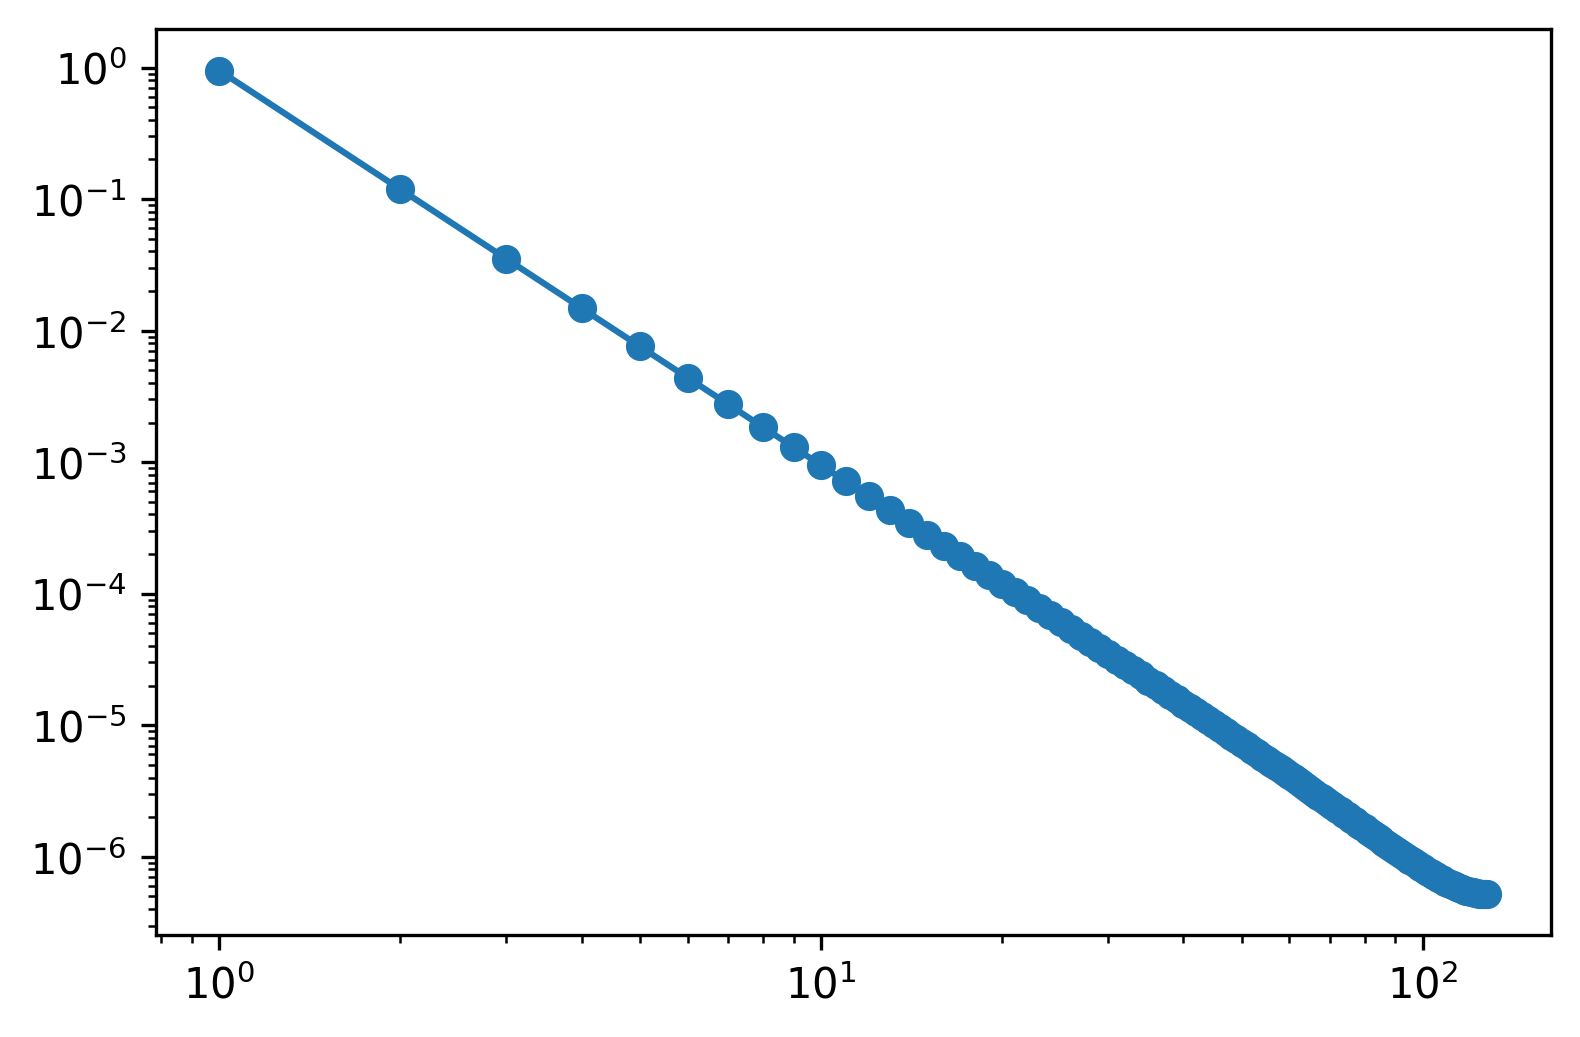

In [31]:
plt.figure(dpi=300)
num = 128
plt.loglog((np.arange(0,255)+1)[:num],(np.array(ls)*np.sin(1.251))[:num],'-o')
# plt.loglog((np.arange(0,255)+1)[:num],(np.array(ls)*np.sin(1.251))[:num],'o')


In [32]:
N = 100*100
# for i in range(N):
#     for k in range(N-i-1):
#         j = k+i+1
#         print(i,j,(N)*i-i*(i+1)/2+(j-i-1))
i, j = 9999,10000
print(i,j,(N)*i-i*(i+1)/2+(j-i-1))




9999 10000 49995000.0


In [33]:
(256*256-1)*256*256/2

2147450880.0